In [3]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn import preprocessing 
from tqdm import tqdm
import seaborn as sns

In [4]:
# Load the data into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/CLAIMS 4-MG-Copy of Tachyhealth  SERIVCES OF NPHIES CLAIMS.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,19,20,21,22,23,24,28,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head(2)

,SN,Provider Pin,Patient ID,DOB[HCP],Gender[HCP],Claim Reference,Claim Occurence Date,Service Type,Service Provider Code,Service Description,...,Other Diagnosis Code,Other Diagnosis Description,Benefit Code,Benefit Description,Policy Number,Length of Stay [Hospitalized],Duration of Treatment [days-supply],Practioner ID,Speciality Code,Speciality Description
0,1.0,2734770.25,107384075.1,30/04/1982,Male,70006.0,24/02/2022,imaging,code: 05060119,Ultrasound of abdomen\r\nFIBROSCAN TRANSIENT U...,...,NaN,NaN,H-OP,Out Patient,1067425.923,NaN,1 d \r\n,10RM0310334,NaN,NaN
1,2.0,2734770.25,109414199.9,14/06/1996,Male,70007.0,24/02/2022,laboratory,code: 02012015,Luteinizing Hormone LH\r\nLH (LUTEINISING HORM...,...,E29,Testicular dysfunction,H-OP,Out Patient,1067425.923,NaN,NaN,01RM9980,NaN,NaN


In [6]:
# Calculate the frequency of each ID value
id_frequencies = df['Patient ID'].value_counts()

In [7]:
# Merge the frequency data back into the original data frame
df = df.merge(id_frequencies, left_on='Patient ID', right_index=True)

In [8]:
df = df.drop(['Patient ID',
              'SN',
              'Provider Pin',
              'Patient ID_x',
              'Claim Reference',
              'Claim Occurence Date',
              'Service Type',
              'Service Provider Code',
              'Service Description',
              'Nphies Standard Code',
              'Nphies Standard Description',
              'Service Date',
              'Principal Diagnosis Code AM',
              'Secondary Diagnosis Code',
              'Secondary Diagnosis Description',
              'Discharge Diagnosis Code',
              'Discharge Diagnosis Description',
              'Other Diagnosis Code',
              'Other Diagnosis Description',
              'Benefit Code',
              'Benefit Description',
              'Policy Number',
              'Duration of Treatment [days-supply]',
              'Practioner ID',
              'Length of Stay [Hospitalized]',
              'Speciality Code',
              'Speciality Description',
              'DOB[HCP]'], axis=1)

In [18]:
df

,Gender[HCP],Requested Quantity,Unit Price,Patient Share,Paid,Principal Diagnosis Description,Patient ID_y
0,Male,1.0,165.375,14.057,126.512,"Fatty (change of) liver, not elsewhere classified",24
5,Male,1.0,33.075,2.811,25.303,"Fatty (change of) liver, not elsewhere classified",24
216,Male,1.0,6.410,0.000,5.365,"Hyperlipidaemia, unspecified",24
217,Male,3.0,1.415,0.000,3.553,"Hyperlipidaemia, unspecified",24
218,Male,3.0,4.455,0.000,11.186,"Hyperlipidaemia, unspecified",24
...,...,...,...,...,...,...,...
203090,Male,1.0,4.935,0.000,4.195,"Crohn's disease, unspecified",11
203091,Male,1.0,12.180,0.000,10.353,"Crohn's disease, unspecified",11
203092,Male,1.0,71.715,0.000,60.958,"Crohn's disease, unspecified",11
203093,Male,6.0,230.400,0.000,0.000,"Crohn's disease, unspecified",11


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203101 entries, 0 to 203094
Data columns (total 7 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Gender[HCP]                      203101 non-null  object 
 1   Requested Quantity               203101 non-null  float64
 2   Unit Price                       203101 non-null  float64
 3   Patient Share                    203101 non-null  float64
 4   Paid                             203101 non-null  float64
 5   Principal Diagnosis Description  203101 non-null  object 
 6   Patient ID_y                     203101 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 12.4+ MB


In [ ]:
df.describe()

,Requested Quantity,Unit Price,Patient Share,Paid,Patient ID_y
count,203101.000000,203101.000000,203101.000000,203101.000000,203101.000000
mean,1.542746,19.579246,1.300112,14.475462,22.333731
std,5.271795,92.143715,3.822829,87.025683,24.305737
min,0.200000,0.000000,-0.001000,0.000000,1.000000
25%,1.000000,3.580000,0.000000,0.000000,8.000000
50%,1.000000,9.670000,0.323000,5.440000,15.000000
75%,1.000000,20.100000,1.866000,14.992000,27.000000
max,999.000000,9920.400000,1003.745000,9920.400000,201.000000


In [ ]:
list(df.columns)

['Gender[HCP]',
 'Requested Quantity',
 'Unit Price',
 'Patient Share',
 'Paid',
 'Principal Diagnosis Description',
 'Patient ID_y']

In [ ]:
print(df.dtypes)

Gender[HCP]                         object
Requested Quantity                 float64
Unit Price                         float64
Patient Share                      float64
Paid                               float64
Principal Diagnosis Description     object
Patient ID_y                         int64
dtype: object


In [ ]:
# Calculate the pairwise correlations between all the columns in the DataFrame
corr_matrix = df.corr()

In [ ]:
corr_matrix

,Requested Quantity,Unit Price,Patient Share,Paid,Patient ID_y
Requested Quantity,1.000000,-0.016068,-0.010556,0.008338,0.073352
Unit Price,-0.016068,1.000000,0.135035,0.931750,0.009203
Patient Share,-0.010556,0.135035,1.000000,0.102051,-0.092163
Paid,0.008338,0.931750,0.102051,1.000000,0.033920
Patient ID_y,0.073352,0.009203,-0.092163,0.033920,1.000000


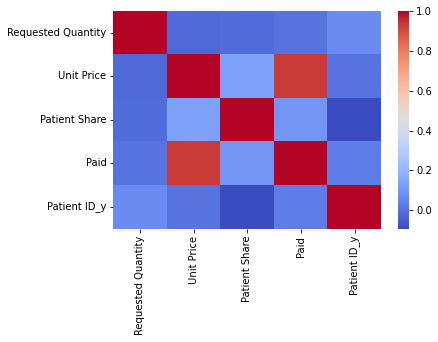

In [ ]:
import seaborn as sns
# Plot the correlation matrix using Seaborn
sns.heatmap(corr_matrix, cmap='coolwarm')

In [9]:
columns_to_encode = df.select_dtypes(include=["object"]).columns

In [10]:
columns_to_encode

Index(['Gender[HCP]', 'Principal Diagnosis Description'], dtype='object')

In [11]:
# Create a OneHotEncoder instance
one_hot_encoder = OneHotEncoder()
for col in columns_to_encode:
    df[col] = df[col].astype(str)
# Fit the OneHotEncoder to the data
one_hot_encoder.fit(df[columns_to_encode])

# Transform the data using the OneHotEncoder
encoded_data = one_hot_encoder.transform(df[columns_to_encode])


In [13]:
encoded_data

<203101x2477 sparse matrix of type '<class 'numpy.float64'>'
	with 406202 stored elements in Compressed Sparse Row format>

In [12]:
# Convert the encoded_data object to a Pandas DataFrame
encoded_data = pd.DataFrame.sparse.from_spmatrix(encoded_data)

# Use the concat method to add the encoded data to the original DataFrame
df = pd.concat([df, encoded_data], axis=1)


In [ ]:
df

In [12]:
!pip install XlsxPandasFormatter
import pathlib
import posixpath
from pathlib import Path
import glob
import os
import pandas as pd
import csv
import pathlib
import posixpath
from pathlib import Path

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 29.8 MB/s 


In [ ]:
# Import the required modules
from tqdm import tqdm

# Create a converter and a progress bar
writer = pd.ExcelWriter('test_2.xlsx', engine='openpyxl')
progress_bar = tqdm(total=1000, desc="Conversion Progress")

# Save the dataframe in one workbook and update the progress bar
df.to_csv(writer, index=False)
progress_bar.update(1000)

# Save the workbook and close the progress bar
writer.save()
progress_bar.close()


In [ ]:
from google.colab import files
# Use the files.download() function to download the file
files.download('/content/test.xlsx')

In [13]:
# Identify the numeric columns in the dataframe
numeric_cols = df.select_dtypes(include=['float', 'int']).columns

In [14]:
# Convert the dataframe to a NumPy array
df_numeric_array = df[numeric_cols].to_numpy()

In [17]:
# Perform operations on the NumPy array, such as dropping missing values
df_numeric_array = df_numeric_array[~np.isnan(df_numeric_array)]

In [18]:
df_numeric_array = df_numeric_array.reshape(-1, 2482)

In [20]:
# Convert the NumPy array back to a Pandas dataframe
df_numeric = pd.DataFrame(df_numeric_array, columns=numeric_cols)

In [21]:
df_numeric

,Requested Quantity,Unit Price,Patient Share,Paid,Patient ID_y,0,1,2,3,4,...,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476
0,1.0,165.375,14.057,126.512,24.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,26.775,0.000,20.483,25.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,26.775,0.000,20.483,25.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,21.840,0.000,16.708,25.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,24.255,0.000,18.555,25.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203096,1.0,22.050,2.481,14.056,9.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203097,1.0,33.075,4.217,23.897,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203098,1.0,16.800,2.142,12.138,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203099,1.0,33.075,4.217,23.897,4.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Install and import the necessary modules
!pip install pyspark

from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession

# Set up the Spark context and session
conf = SparkConf().setAppName("my_spark_app")
sc = SparkContext(conf=conf)
spark = SparkSession(sc)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the necessary modules
from pyspark import RDD

In [ ]:
# Convert the dataframe to a Spark RDD
df_rdd = df[numeric_cols].rdd

# Perform operations on the RDD, such as dropping missing values
df_rdd = df_rdd.filter(lambda x: x.isNotNull())

# Convert the RDD back to a Spark dataframe
df_numeric = df_rdd.toDF(numeric_cols)

# Print the resulting dataframe
df_numeric.show()

# Stop the Spark context
sc.stop()


In [ ]:
# Import the necessary modules
from pyspark.sql.functions import withColumn
from pyspark.sql.functions import monotonically_increasing_id
# Add a unique ID to each row in the DataFrame
df = df.withColumn("id", monotonically_increasing_id())

In [ ]:
# Convert the DataFrame to an RDD
from pyspark import RDD, SparkContext
# Convert the DataFrame to an RDD using the toDF() method and the SparkContext
df_rdd = RDD(df, ctx=sc).toDF()


# Cache the RDD in memory
df_rdd.persist(StorageLevel.MEMORY_ONLY)

# Perform operations on the RDD
df_rdd = df_rdd.filter(lambda x: x.isNotNull())

# Convert the RDD back to a DataFrame
df_numeric = df_rdd.toDF(numeric_cols)

# Print the resulting DataFrame
df_numeric.show()


In [ ]:
# Import the necessary modules
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.getOrCreate()

# Load the data into a PySpark DataFrame
df 

# Convert the DataFrame to an RDD using the mapPartitions() method
df_rdd = df.rdd.mapPartitions(lambda x: [list(x)])


In [ ]:
# Fit the GaussianMixture model to the numeric data using a streaming approach
model = GaussianMixture()

# Set the batch size for the streaming data
batch_size = 1000

# Initialize a progress bar
pbar = tqdm(total=len(df_numeric))

# Iterate over the data in batches
for i in range(0, len(df_numeric), batch_size):
    # Get the current batch of data
    batch = df_numeric[i:i+batch_size]

    # Resample the data to avoid oversampling
    resampled_batch = resample(batch, replace=False)

    # Fit the model to the batch of data
    model.fit(resampled_batch)

    # Update the progress bar
    pbar.update(batch_size)

# Close the progress bar
pbar.close()

# Save the trained model
# Your code to save the model

  0%|          | 0/203101 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
  0%|          | 1000/203101 [00:04<15:54, 211.76it/s]/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
  1%|          | 2000/203101 [00:10<17:15, 194.27it/s]/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
  1%|▏         | 3000/203101 [00:23<28:52, 115.48it/s]/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: Future

In [22]:
df

,Gender[HCP],Requested Quantity,Unit Price,Patient Share,Paid,Principal Diagnosis Description,Patient ID_y,0,1,2,...,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476
0,Male,1.0,165.375,14.057,126.512,"Fatty (change of) liver, not elsewhere classified",24,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Male,1.0,26.775,0.000,20.483,Hyperprolactinaemia,25,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Male,1.0,26.775,0.000,20.483,Hyperprolactinaemia,25,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Male,1.0,21.840,0.000,16.708,Hyperprolactinaemia,25,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Male,1.0,24.255,0.000,18.555,Hyperprolactinaemia,25,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203096,Male,1.0,22.050,2.481,14.056,Dental examination,9,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203097,Male,1.0,33.075,4.217,23.897,Examination of eyes and vision,3,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203098,Male,1.0,16.800,2.142,12.138,Examination of eyes and vision,3,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203099,Male,1.0,33.075,4.217,23.897,Examination of eyes and vision,4,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pickle

# Save the model to a file
with open('gaussian_mixture_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [24]:
import pickle
import numpy as np

# Load the model from a file
with open('/content/drive/MyDrive/gaussian_mixture_model.pkl', 'rb') as f:
    model_bytes = f.read()

# Deserialize the byte string into a Python object
model = pickle.loads(model_bytes)

In [25]:
# Use the model to predict which rows in the data are anomalies
predictions = []
for row in tqdm(df_numeric.iterrows(), total=df_numeric.shape[0]):
    # Use the row data directly without converting it to an array
    # Use the reshape() method to ensure the data has the correct shape
    predictions.append(model.predict(df_numeric.iloc[row[0]].values.reshape(1, -1)))

100%|██████████| 203101/203101 [27:16<00:00, 124.14it/s]


In [27]:
# Create a new column in the DataFrame to store the predictions
df['anomaly'] = predictions

# Display the DataFrame
df


,Gender[HCP],Requested Quantity,Unit Price,Patient Share,Paid,Principal Diagnosis Description,Patient ID_y,0,1,2,...,2468,2469,2470,2471,2472,2473,2474,2475,2476,anomaly
0,Male,1.0,165.375,14.057,126.512,"Fatty (change of) liver, not elsewhere classified",24,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0]
1,Male,1.0,26.775,0.000,20.483,Hyperprolactinaemia,25,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0]
2,Male,1.0,26.775,0.000,20.483,Hyperprolactinaemia,25,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0]
3,Male,1.0,21.840,0.000,16.708,Hyperprolactinaemia,25,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0]
4,Male,1.0,24.255,0.000,18.555,Hyperprolactinaemia,25,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203096,Male,1.0,22.050,2.481,14.056,Dental examination,9,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0]
203097,Male,1.0,33.075,4.217,23.897,Examination of eyes and vision,3,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0]
203098,Male,1.0,16.800,2.142,12.138,Examination of eyes and vision,3,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0]
203099,Male,1.0,33.075,4.217,23.897,Examination of eyes and vision,4,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0]


In [28]:
an_df = df.drop(df.columns[:-1], axis=1)

In [29]:
# Load the data into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/CLAIMS 4-MG-Copy of Tachyhealth  SERIVCES OF NPHIES CLAIMS.csv')
df3 = pd.concat([df, an_df], axis=0)
df3.to_csv('final_med_gulf.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,19,20,21,22,23,24,28,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the data
df = df3

# Select the target column
target_col = 'anomaly'

# Define a function to compute the chi-squared test
def chi2_test(col):
    # Compute the chi-squared test between the column and the target column
    results = chi2_contingency(pd.crosstab(df[target_col], df[col]))
    return results[0]

# Compute the chi-squared test for each column
chi2_values = df.drop(target_col, axis=1).apply(chi2_test)

# Print the results
print(chi2_values)


Empty DataFrame
Columns: [SN, Provider Pin, Patient ID, DOB[HCP], Gender[HCP], Claim Reference, Claim Occurence Date, Service Type, Service Provider Code, Service Description, Nphies Standard Code, Nphies Standard Description, Service Date, Requested Quantity, Unit Price, Patient Share, Paid, Principal Diagnosis Code AM, Principal Diagnosis Description, Secondary Diagnosis Code, Secondary Diagnosis Description, Discharge Diagnosis Code, Discharge Diagnosis Description, Other Diagnosis Code, Other Diagnosis Description, Benefit Code, Benefit Description, Policy Number, Length of Stay [Hospitalized], Duration of Treatment [days-supply], Practioner ID, Speciality Code, Speciality Description]
Index: []

[0 rows x 33 columns]


In [ ]:

# Use the model to predict which rows in the data are anomalies
predictions = model.predict(df)

# Create a new column in the DataFrame to store the predictions
df['anomaly'] = predictions

# Display the DataFrame
print(df)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


ValueError: ignored

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

Create a local outlier factor instance
lof = LocalOutlierFactor()

Calculate the outlier scores for each row in your data
outlier_scores = lof.fit_predict(df)

In [ ]:
######################################################################################